In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/optum/csv/conditions.csv')

In [ ]:
data.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


Text(0.5, 1.0, 'Missing values Heatmap')

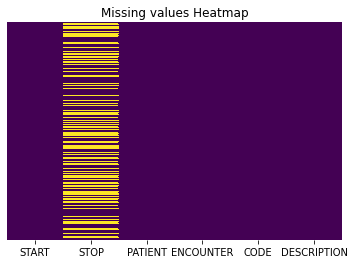

In [ ]:
  sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Missing values Heatmap")

In [ ]:
data.nunique()

START          5356
STOP           2923
PATIENT        1152
ENCOUNTER      7650
CODE            129
DESCRIPTION     129
dtype: int64

In [ ]:
data.dtypes

START          object
STOP           object
PATIENT        object
ENCOUNTER      object
CODE            int64
DESCRIPTION    object
dtype: object

In [ ]:
p_data = pd.read_csv('/content/drive/MyDrive/ML/optum/csv/patients.csv')

In [ ]:
p_data.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,M,white,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,M,white,nonhispanic,M,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [ ]:
p_data.nunique()

Id                     1171
BIRTHDATE               982
DEATHDATE               171
SSN                    1170
DRIVERS                 952
PASSPORT                898
PREFIX                    3
FIRST                   992
LAST                    490
SUFFIX                    3
MAIDEN                  260
MARITAL                   2
RACE                      5
ETHNICITY                 2
GENDER                    2
BIRTHPLACE              293
ADDRESS                1171
CITY                    237
STATE                     1
COUNTY                   14
ZIP                     209
LAT                    1171
LON                    1171
HEALTHCARE_EXPENSES    1171
HEALTHCARE_COVERAGE    1066
dtype: int64

In [ ]:
p_data.dtypes

Id                      object
BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object

**Genral Gender Race Demographic and Disease analysis on the Patients in the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


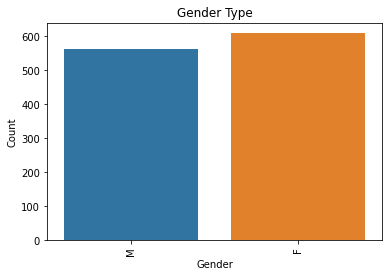

In [ ]:
sns.countplot(p_data["GENDER"])
plt.xticks(rotation = 90)
plt.title('Gender Type')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


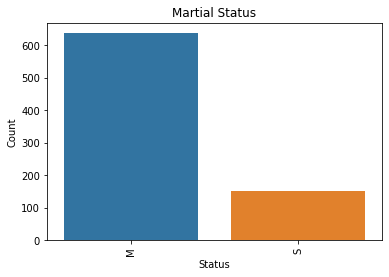

In [ ]:
sns.countplot(p_data["MARITAL"])
plt.xticks(rotation = 90)
plt.title('Martial Status')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()

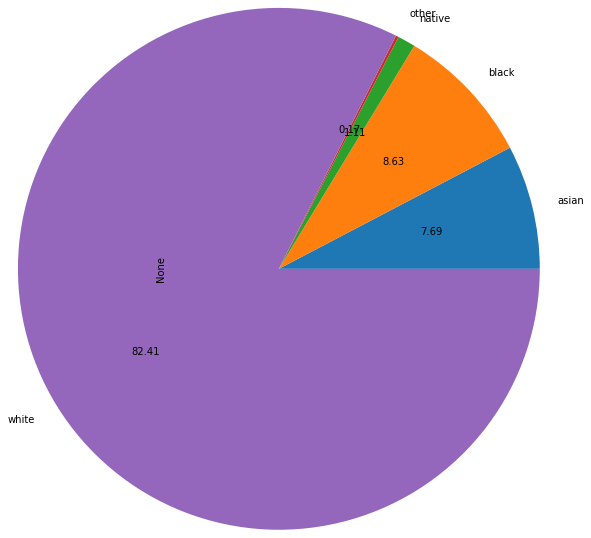

In [ ]:
p_data.groupby('RACE').size().plot(kind='pie', radius =3,autopct='%.2f')

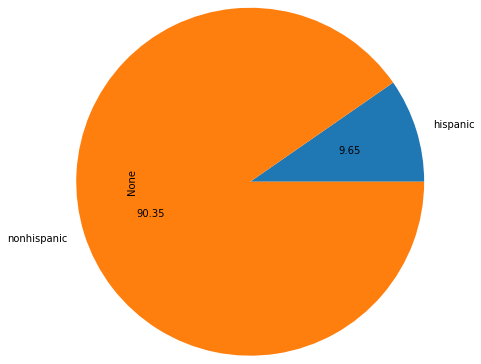

In [ ]:
p_data.groupby('ETHNICITY').size().plot(kind='pie', radius =2,autopct='%.2f')

In [ ]:
import datetime
p_data["BIRTH"] = pd.to_datetime(p_data["BIRTHDATE"])
p_data["DEATH"]=  pd.to_datetime(p_data["DEATHDATE"])
p_data["age"] = ((pd.Timestamp.now().normalize() -p_data["BIRTH"]).where(p_data["DEATHDATE"].isnull(), other=p_data["DEATH"]-p_data["BIRTH"]))
p_data["age"]=(p_data["age"]/365.2422)

In [ ]:
p_data.tail(5)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,BIRTH,DEATH,age
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,asian,hispanic,F,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31,1922-02-14,NaT,99 days 17:16:59.311131079
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,white,nonhispanic,M,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52,1977-08-08,NaT,44 days 05:44:21.502093679
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,white,nonhispanic,F,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24,1914-09-05,2006-05-26,91 days 17:20:41.105436337
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,white,nonhispanic,F,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00,1914-09-05,1990-03-17,75 days 12:44:12.708148182
1170,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107 days 03:56:53.334165658


In [ ]:
p_data["age"]=p_data["age"].dt.days

In [ ]:
p_data.dtypes

Id                             object
BIRTHDATE                      object
DEATHDATE                      object
SSN                            object
DRIVERS                        object
PASSPORT                       object
PREFIX                         object
FIRST                          object
LAST                           object
SUFFIX                         object
MAIDEN                         object
MARITAL                        object
RACE                           object
ETHNICITY                      object
GENDER                         object
BIRTHPLACE                     object
ADDRESS                        object
CITY                           object
STATE                          object
COUNTY                         object
ZIP                           float64
LAT                           float64
LON                           float64
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
BIRTH                  datetime64[ns]
DEATH       

In [ ]:
p_data.tail(5)

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,BIRTH,DEATH,age
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,1922-02-14,NaN,999-60-9291,S99949872,X45944669X,Mrs.,Conchita9,Peres371,NaN,Pedroza523,M,asian,hispanic,F,Juarez Chihuahua MX,365 Gorczany Crossing Apt 64,Cambridge,Massachusetts,Middlesex County,2141.0,42.413390,-71.102083,1622314.87,32086.31,1922-02-14,NaT,99
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,1977-08-08,NaN,999-29-3501,S99999143,X43299813X,Mr.,Laverne101,Hane680,NaN,NaN,S,white,nonhispanic,M,Upton Massachusetts US,177 Volkman Heights Suite 94,Beverly,Massachusetts,Essex County,1915.0,42.573337,-70.883400,979724.25,3130.52,1977-08-08,NaT,44
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,1914-09-05,2006-05-26,999-60-2184,S99940416,X26292359X,Ms.,Kimber624,Volkman526,NaN,NaN,S,white,nonhispanic,F,Fall River Massachusetts US,583 Price Rue,Norwood,Massachusetts,Norfolk County,NaN,42.211364,-71.213621,1560540.35,52391.24,1914-09-05,2006-05-26,91
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,1914-09-05,1990-03-17,999-48-3257,S99949673,X25242364X,Mrs.,Shira43,Bruen238,NaN,Jacobi462,M,white,nonhispanic,F,Springfield Massachusetts US,537 Boehm Course,Norwood,Massachusetts,Norfolk County,2062.0,42.167146,-71.235461,1375833.47,13157.00,1914-09-05,1990-03-17,75
1170,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


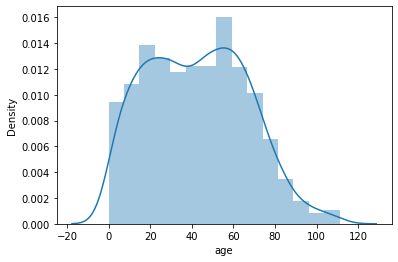

In [ ]:
sns.distplot(p_data["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


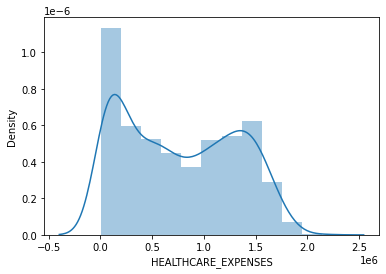

In [ ]:
sns.distplot(p_data["HEALTHCARE_EXPENSES"])

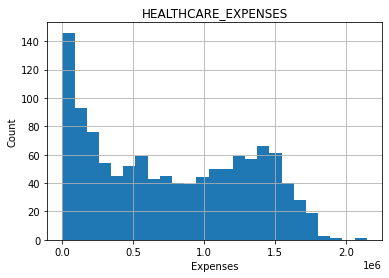

In [ ]:
p_data["HEALTHCARE_EXPENSES"].hist(bins=25)
plt.xlabel("Expenses")
plt.ylabel("Count")
plt.title("HEALTHCARE_EXPENSES")
plt.show()

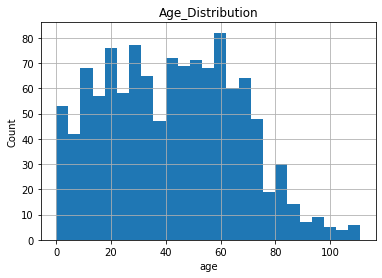

In [ ]:
p_data["age"].hist(bins=25)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Age_Distribution")
plt.show()

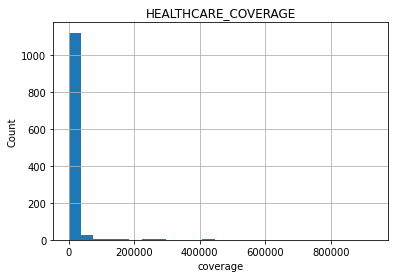

In [ ]:
p_data["HEALTHCARE_COVERAGE"].hist(bins=25)
plt.xlabel("coverage")
plt.ylabel("Count")
plt.title("HEALTHCARE_COVERAGE")
plt.show()

In [ ]:
df=p_data[["GENDER","MARITAL","RACE","ETHNICITY","CITY","HEALTHCARE_EXPENSES","HEALTHCARE_COVERAGE","age"]]


**Finding possible Covariance**

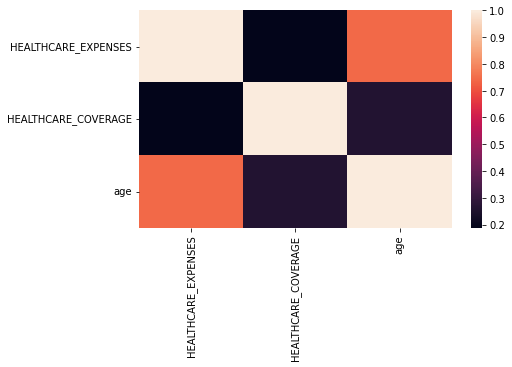

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

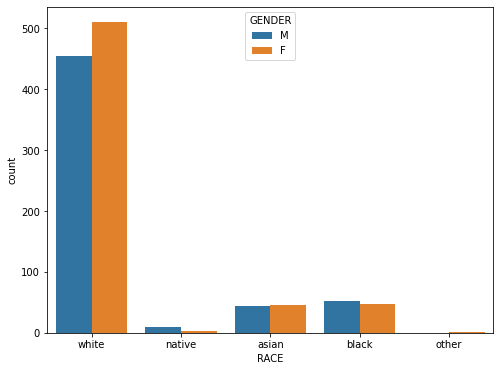

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="RACE", data=p_data,
             hue="GENDER")
plt.show()

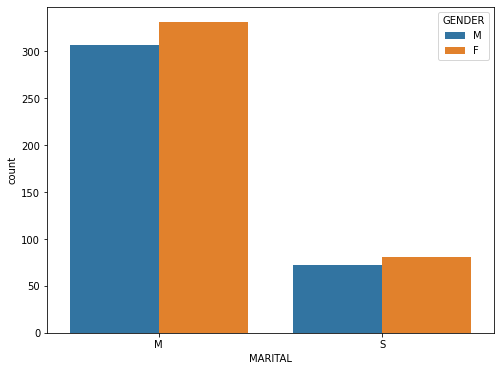

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="MARITAL", data=p_data,
             hue="GENDER")
plt.show()

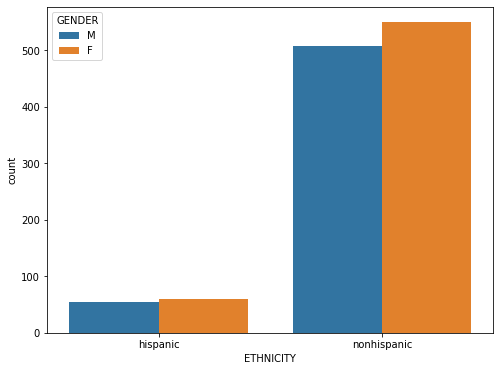

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="ETHNICITY", data=p_data,
             hue="GENDER")
plt.show()

In [ ]:
bins= [13,21,31,40,60,70,110]
labels = ['0-13','14-21','22-31','32-40','41-60', '61-70']
p_data['AgeGroup'] = pd.cut(p_data['age'], bins=bins, labels=labels, right=False)

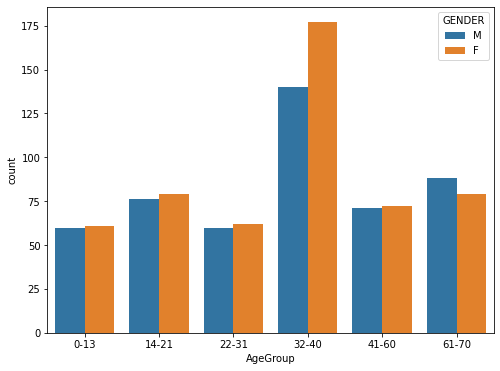

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="AgeGroup", data=p_data,
             hue="GENDER")
plt.show()

**Demographic Insights for finding distribution of Pateints spread around the states which is useful for determinig if some possible common reason for non adherence**

In [ ]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
import math
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in p_data.iterrows():
    if not math.isnan(row['LON']) and not math.isnan(row['LAT']):
        mc.add_child(Marker([row['LAT'], row['LON']]))
m_3.add_child(mc)
m_3

In [ ]:
df_merge_col = pd.merge(data,p_data, left_on='PATIENT', right_on='Id')

df_merge_col


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,Extracted,Extracted2,Extracted3,Extracted4,Extracted7,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,BIRTH,DEATH,age,AgeGroup
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),Chronic sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
1,2011-12-08,2011-12-22,1d604da9-9a81-4ba9-80c2-de3375d59b40,792fae81-a007-44b0-8221-46953737b089,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
2,2019-03-20,2019-04-10,1d604da9-9a81-4ba9-80c2-de3375d59b40,4e595f0c-f50f-461b-a04e-13b4e492350e,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
3,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,1978-05-27,NaT,43,32-40
4,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),Acute viral pharyngitis (disorder),,NaN,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,1978-05-27,NaT,43,32-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaN,,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107,61-70
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),Chronic sinusitis (disorder),,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107,61-70
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaN,,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,19

In [ ]:
df_inner = pd.merge(data, p_data, left_on='PATIENT', right_on='Id', how='inner')

df_inner

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,Extracted,Extracted2,Extracted3,Extracted4,Extracted7,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,BIRTH,DEATH,age,AgeGroup
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder),Chronic sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
1,2011-12-08,2011-12-22,1d604da9-9a81-4ba9-80c2-de3375d59b40,792fae81-a007-44b0-8221-46953737b089,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
2,2019-03-20,2019-04-10,1d604da9-9a81-4ba9-80c2-de3375d59b40,4e595f0c-f50f-461b-a04e-13b4e492350e,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88,1989-05-25,NaT,32,22-31
3,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder),Viral sinusitis (disorder),,NaN,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,1978-05-27,NaT,43,32-40
4,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder),Acute viral pharyngitis (disorder),,NaN,NaN,NaN,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,M,white,nonhispanic,F,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19,1978-05-27,NaT,43,32-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,1984-12-29,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,87cfa8a4-126e-4c58-a839-e8b725828d0f,64859006,Osteoporosis (disorder),NaN,,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107,61-70
8372,1988-08-24,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,97c0226c-92b4-4e78-b81f-4225d8473ba3,40055000,Chronic sinusitis (disorder),Chronic sinusitis (disorder),,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1914-09-05,NaN,999-72-8988,S99919344,X80016509X,Mrs.,Oneida64,Nicolas769,NaN,MacGyver246,M,white,nonhispanic,F,Worcester Massachusetts US,163 Schulist Crossing,Norwood,Massachusetts,Norfolk County,2090.0,42.233960,-71.245224,1510158.34,26565.65,1914-09-05,NaT,107,61-70
8373,2009-08-08,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,1c91f459-adf0-4fe6-abdb-d248a91b9d85,230690007,Stroke,NaN,,NaN,NaN,NaN,fc817953-cc8b-45db-9c85-7c0ced8fa90d,19

In [ ]:
df_merge_col.groupby(by="DESCRIPTION").sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f3d036d3350>>

In [ ]:
df_categorical = df_merge_col.select_dtypes(include='object')

In [ ]:
df_numerical = df_merge_col.select_dtypes(exclude='object')


In [ ]:
df_numerical_cols = df_numerical.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()

In [ ]:
grouped = df_merge_col.groupby("DESCRIPTION")

In [ ]:
names=data['DESCRIPTION'].unique().tolist()

In [ ]:
print(names)

# Distribution of Diffrent Disease count in the provided Datser

In [ ]:
 def extractServiceName(x):
    if x in  names[:40]:
        return x
    else:
        return ''
data['Extracted'] = data["DESCRIPTION"].apply(lambda x : extractServiceName(x))

In [ ]:
 data['Extracted'].replace('', np.nan, inplace=True)

In [ ]:
data["Extracted"].dropna()

0             Chronic sinusitis (disorder)
1               Viral sinusitis (disorder)
2       Acute viral pharyngitis (disorder)
3              Acute bronchitis (disorder)
4       Acute viral pharyngitis (disorder)
                       ...                
8369        Miscarriage in first trimester
8370                Osteoarthritis of knee
8372          Chronic sinusitis (disorder)
8374            Viral sinusitis (disorder)
8375            Viral sinusitis (disorder)
Name: Extracted, Length: 6545, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


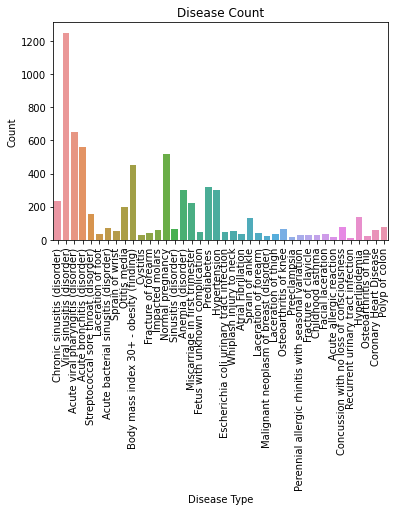

In [ ]:
sns.countplot(data['Extracted'])
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

In [ ]:
 def extractServiceName(x):
    if x in  names[40:80]:
        return x
    else:
        return ''
data['Extracted2'] = data["DESCRIPTION"].apply(lambda x : extractServiceName(x))

In [ ]:
 data['Extracted2'].replace('', np.nan, inplace=True)

In [ ]:
data["Extracted2"].dropna()

203                                       Tubal pregnancy
204                                         Blighted ovum
207                                                Stroke
216     Fracture of the vertebral column with spinal c...
217                                     Atopic dermatitis
                              ...                        
8353                              Osteoporosis (disorder)
8364                                               Stroke
8366                        Fracture subluxation of wrist
8371                              Osteoporosis (disorder)
8373                                               Stroke
Name: Extracted2, Length: 1307, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


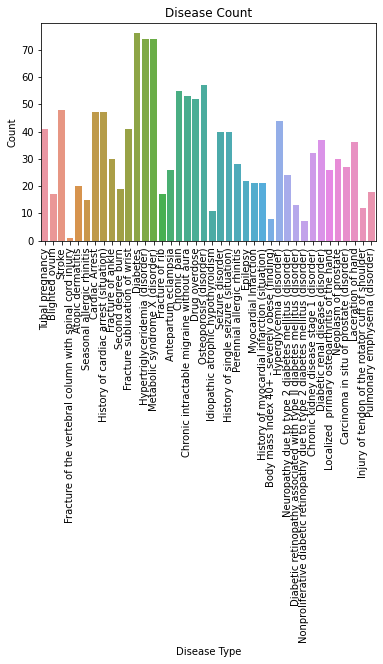

In [ ]:
sns.countplot(data["Extracted2"])
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

In [ ]:
 def extractServiceName(x):
    if x in  names[80:]:
        return x
    else:
        return ''
data['Extracted3'] = data["DESCRIPTION"].apply(lambda x : extractServiceName(x))

In [ ]:
 data['Extracted3'].replace('', np.nan, inplace=True)

In [ ]:
data["Extracted3"].dropna()

492                                    Appendicitis
493                         History of appendectomy
494                       Major depression disorder
495                                      Alcoholism
524            Burn injury(morphologic abnormality)
                           ...                     
8279    Chronic congestive heart failure (disorder)
8333                           Rheumatoid arthritis
8354                 Alzheimer's disease (disorder)
8358                                      Pneumonia
8368    Chronic congestive heart failure (disorder)
Name: Extracted3, Length: 524, dtype: object

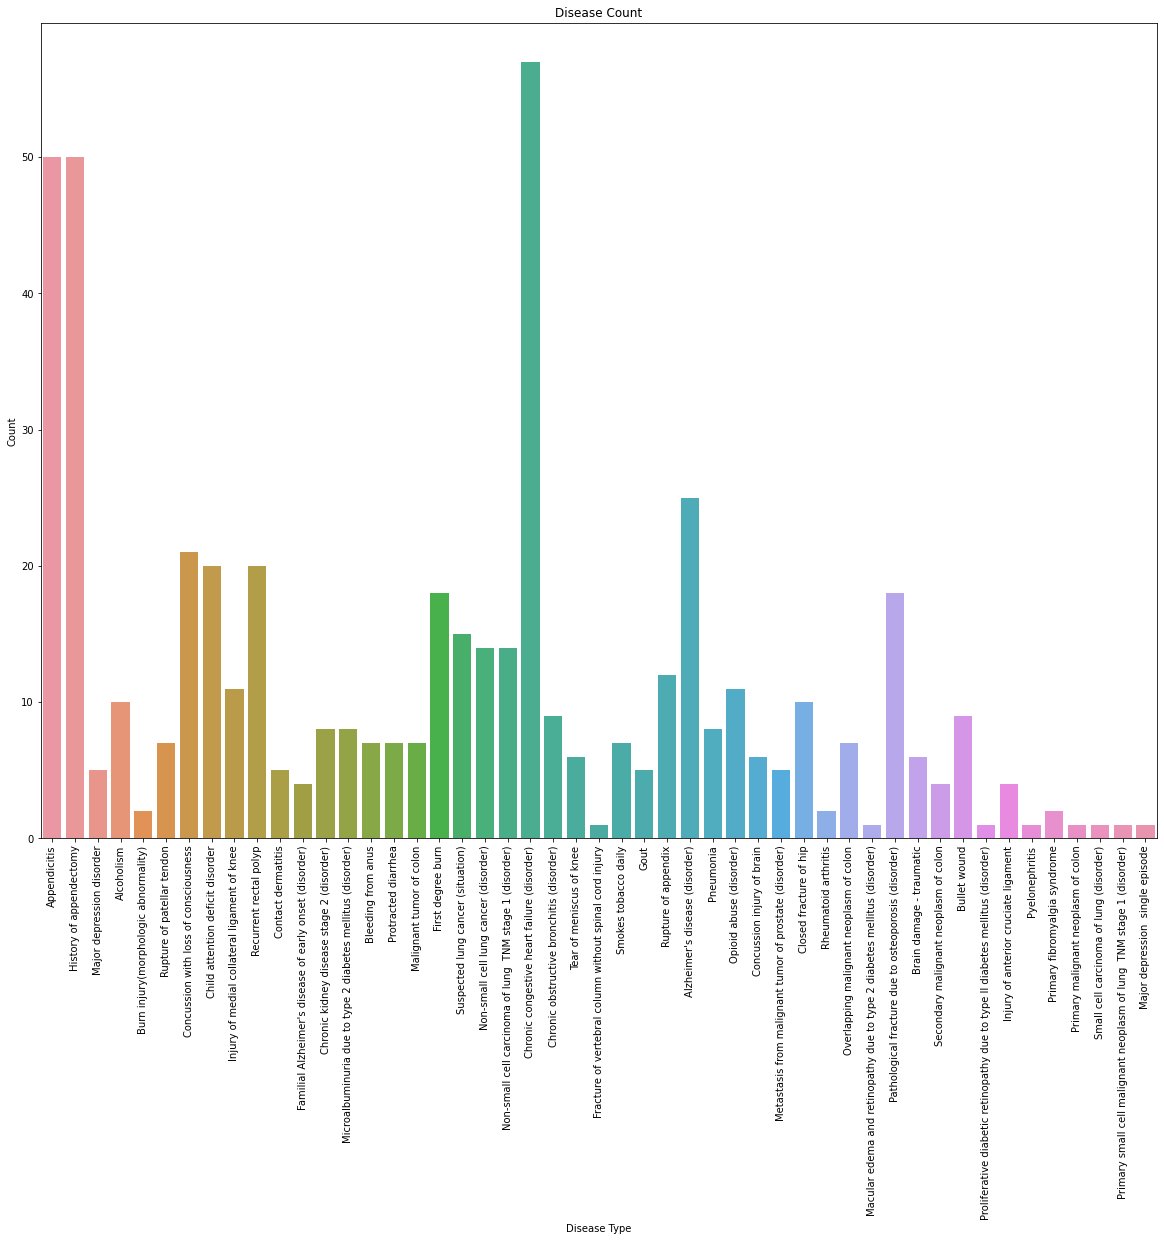

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x="Extracted3",data=data)
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

# Distribution of Diseases in Dataset based on race,gender,age and ethinicity

1.From the plots it can be found out that more aged people were more effected in diseases related to heart, diabetes, hyperlipdemia related syndromes and bones with some other diseases also in the list 

2.Male were having higher heart related problems than feamale with females majoring in some disases too

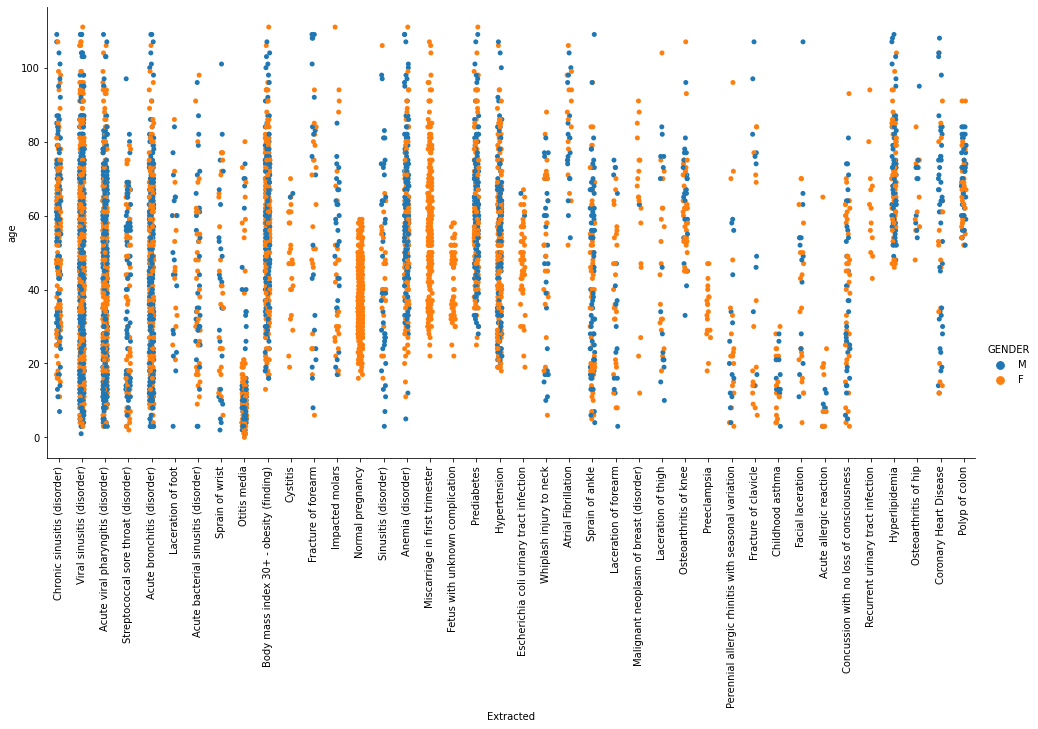

In [ ]:

sns.catplot(x="Extracted", y="age", data=df_merge_col,height=7, aspect=2,hue="GENDER")
plt.xticks(rotation = 90)
plt.show()

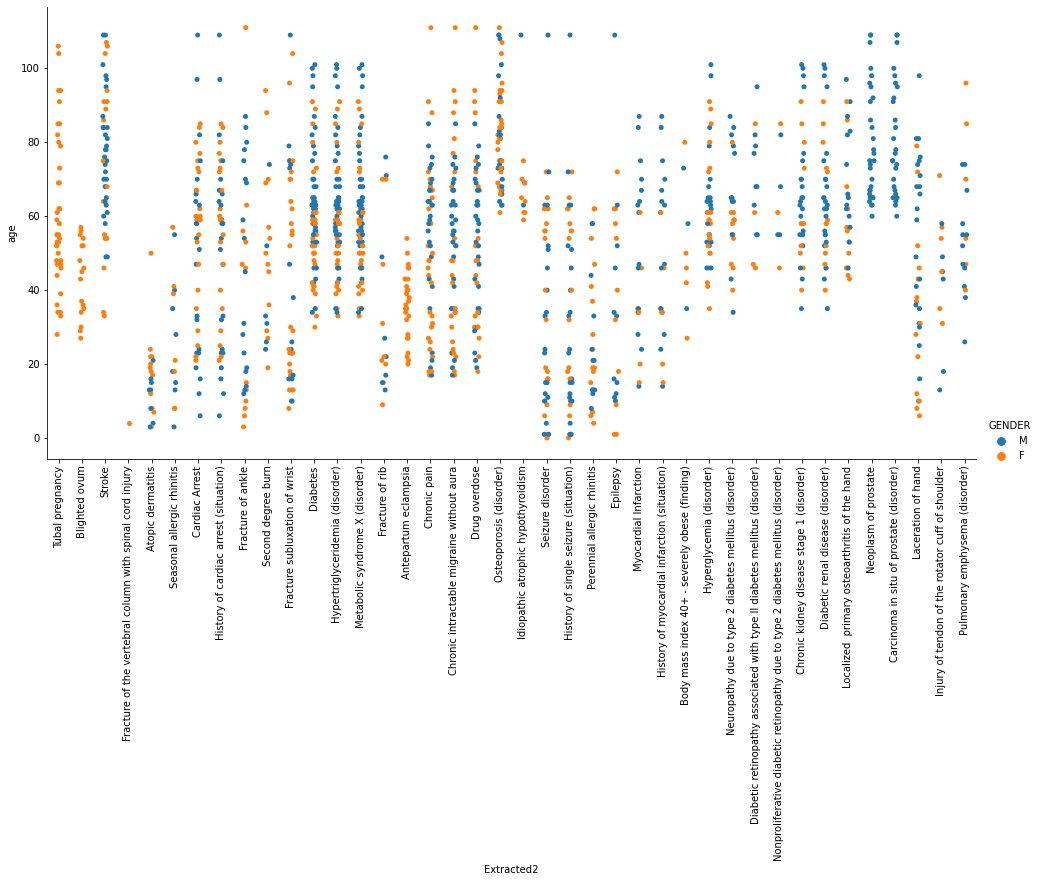

In [ ]:

sns.catplot(x="Extracted2", y="age", data=df_merge_col,height=7, aspect=2,hue="GENDER")
plt.xticks(rotation = 90)
plt.show()

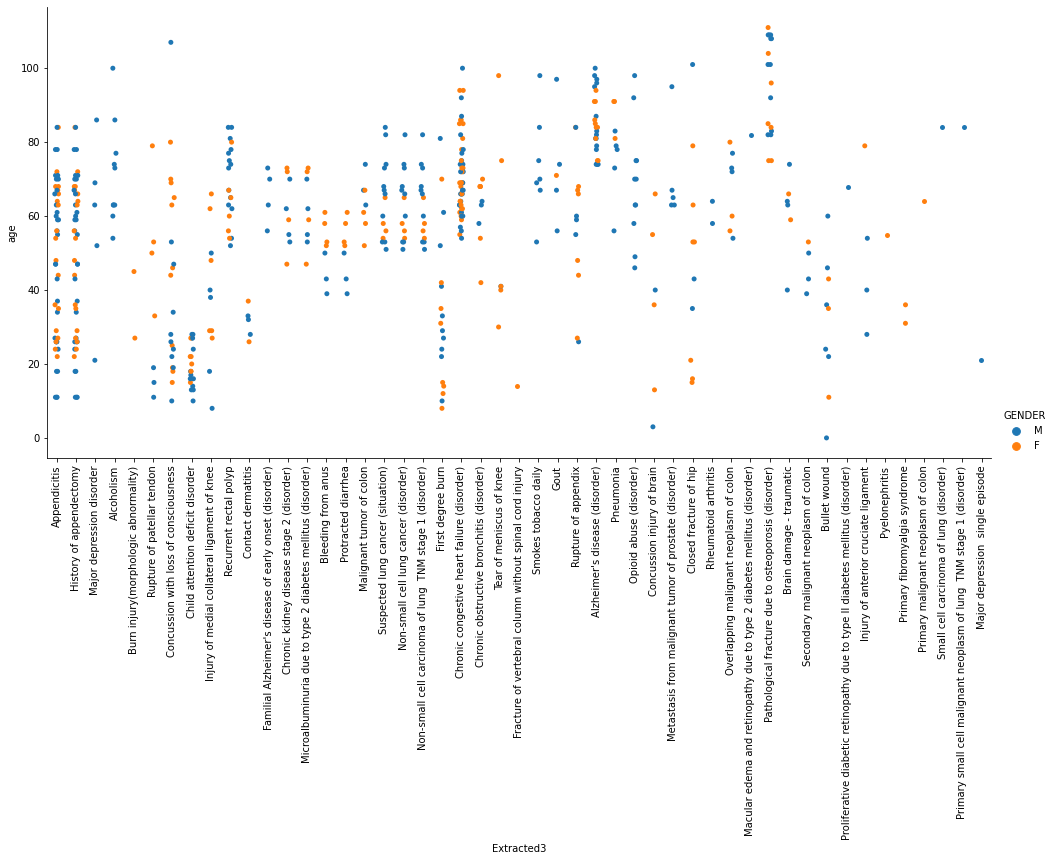

In [ ]:

sns.catplot(x="Extracted3", y="age", data=df_merge_col,height=7, aspect=2,hue="GENDER")
plt.xticks(rotation = 90)
plt.show()

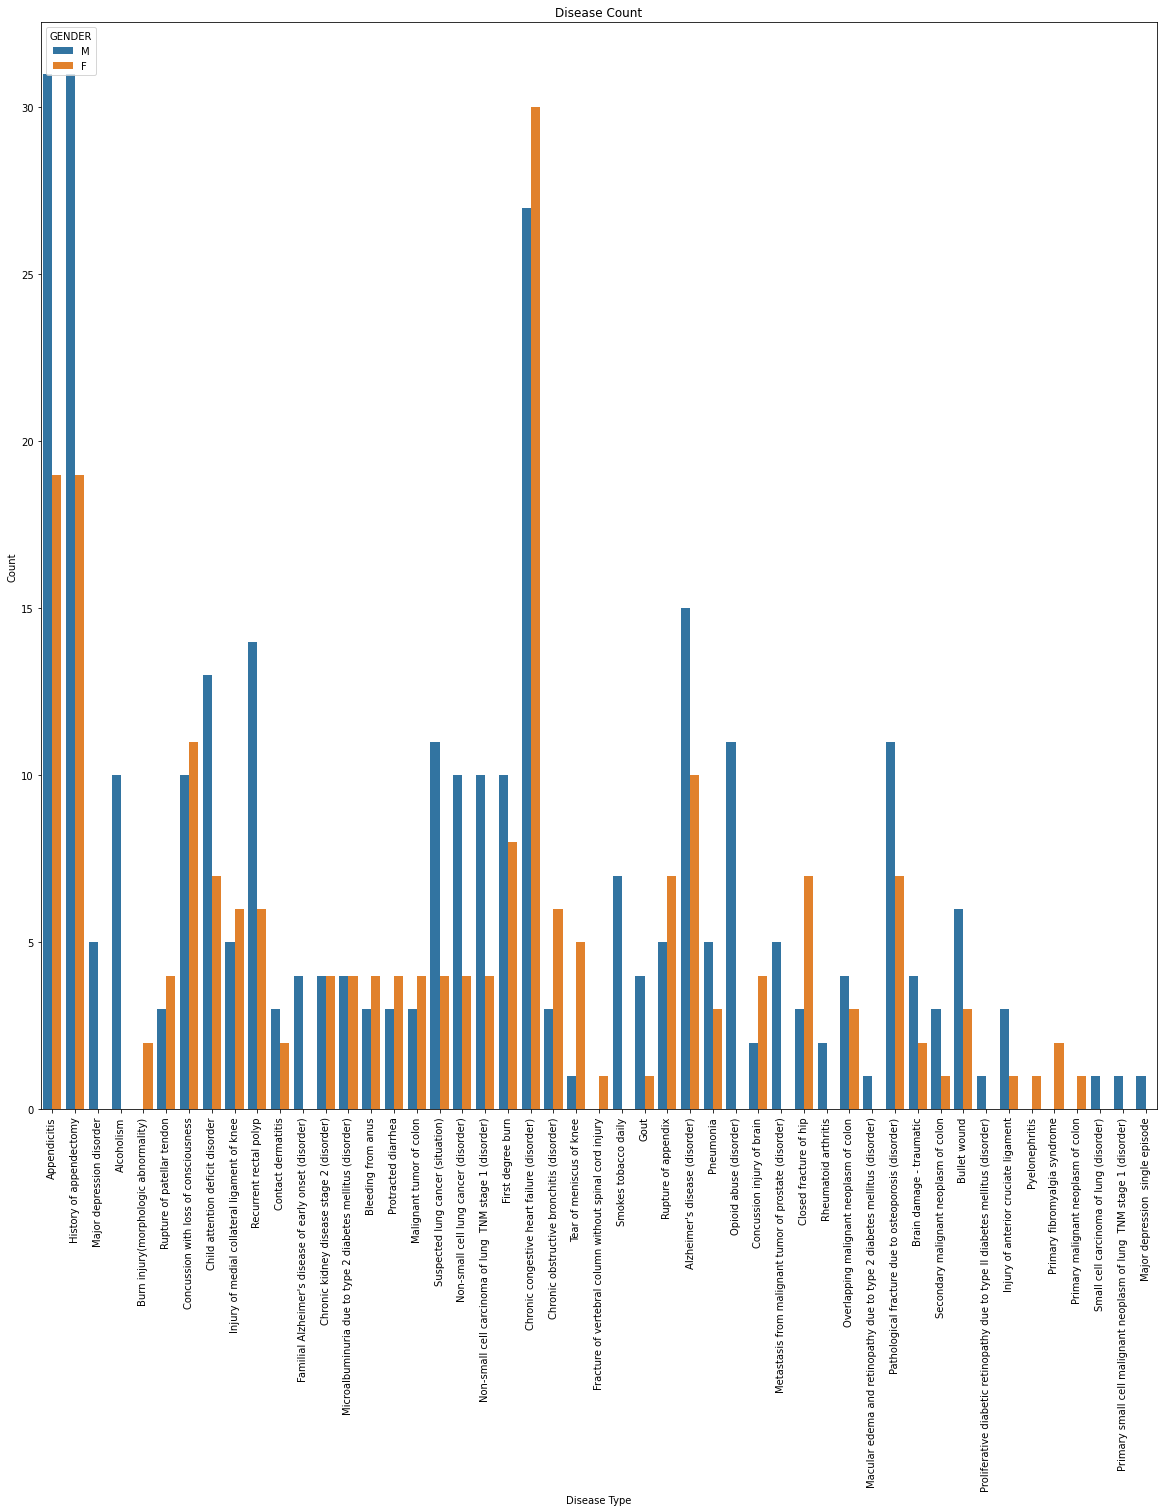

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x="Extracted3",data=df_merge_col, hue="GENDER")
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

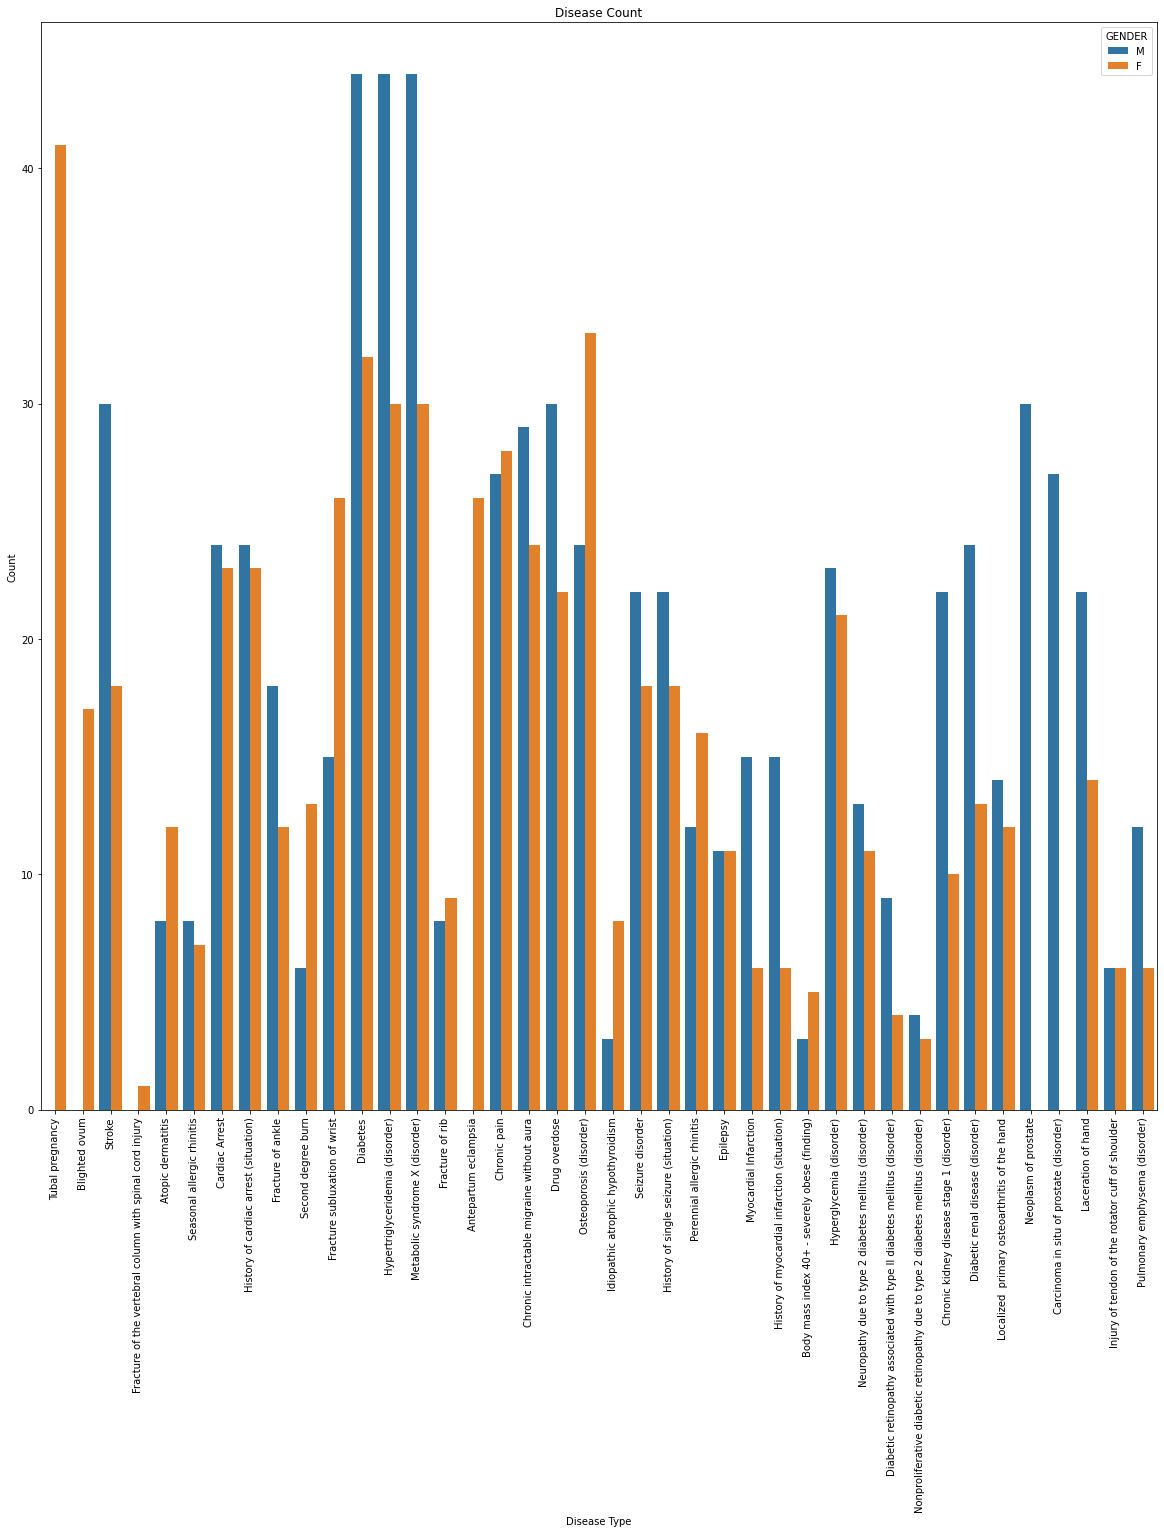

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x="Extracted2",data=df_merge_col, hue="GENDER")
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

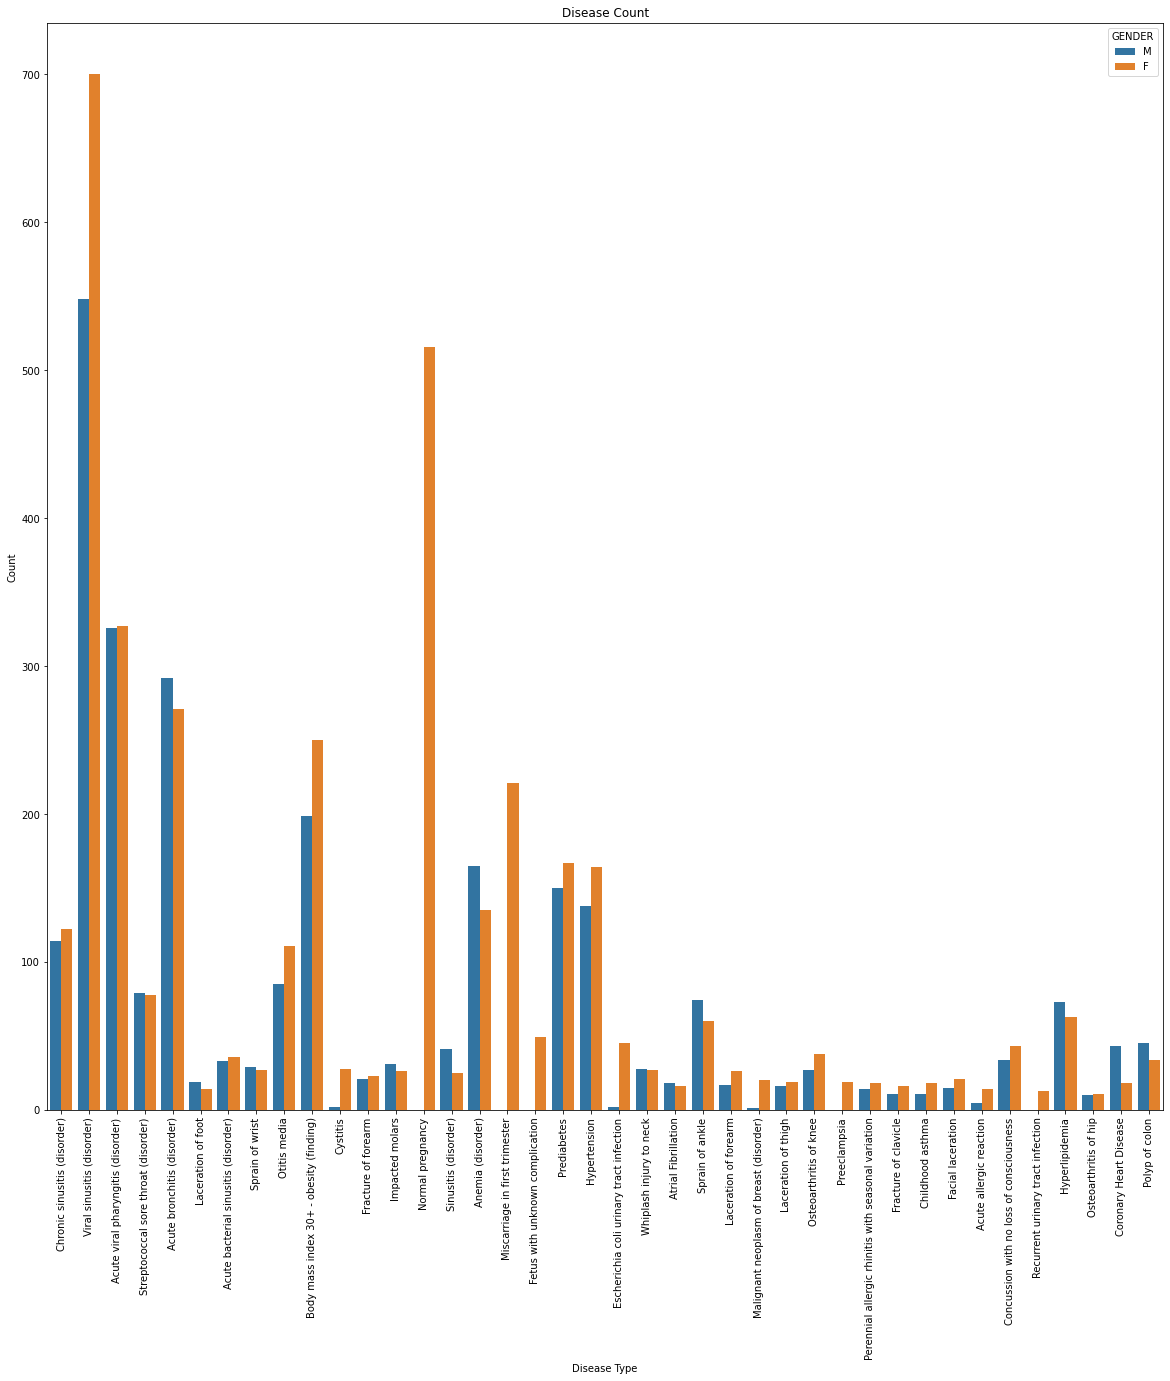

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x="Extracted",data=df_merge_col, hue="GENDER")
plt.xticks(rotation = 90)
plt.title('Disease Count')
plt.ylabel('Count')
plt.xlabel('Disease Type')
plt.show()

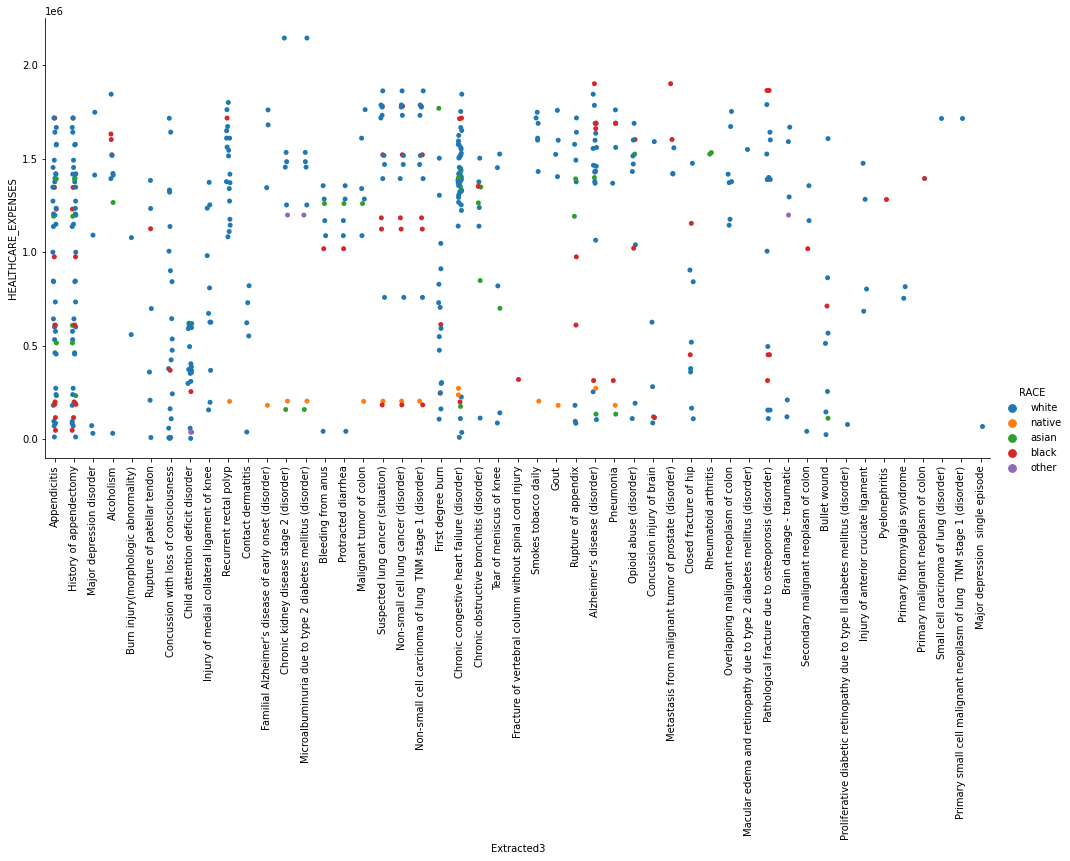

In [ ]:

sns.catplot(x="Extracted3", y="HEALTHCARE_EXPENSES", data=df_merge_col,height=7, aspect=2,hue="RACE")
plt.xticks(rotation = 90)
plt.show()

Race  and Ethinic Distribution of peoples based on diffrent diseases no such pattern is yet visible for disease majoring in a group

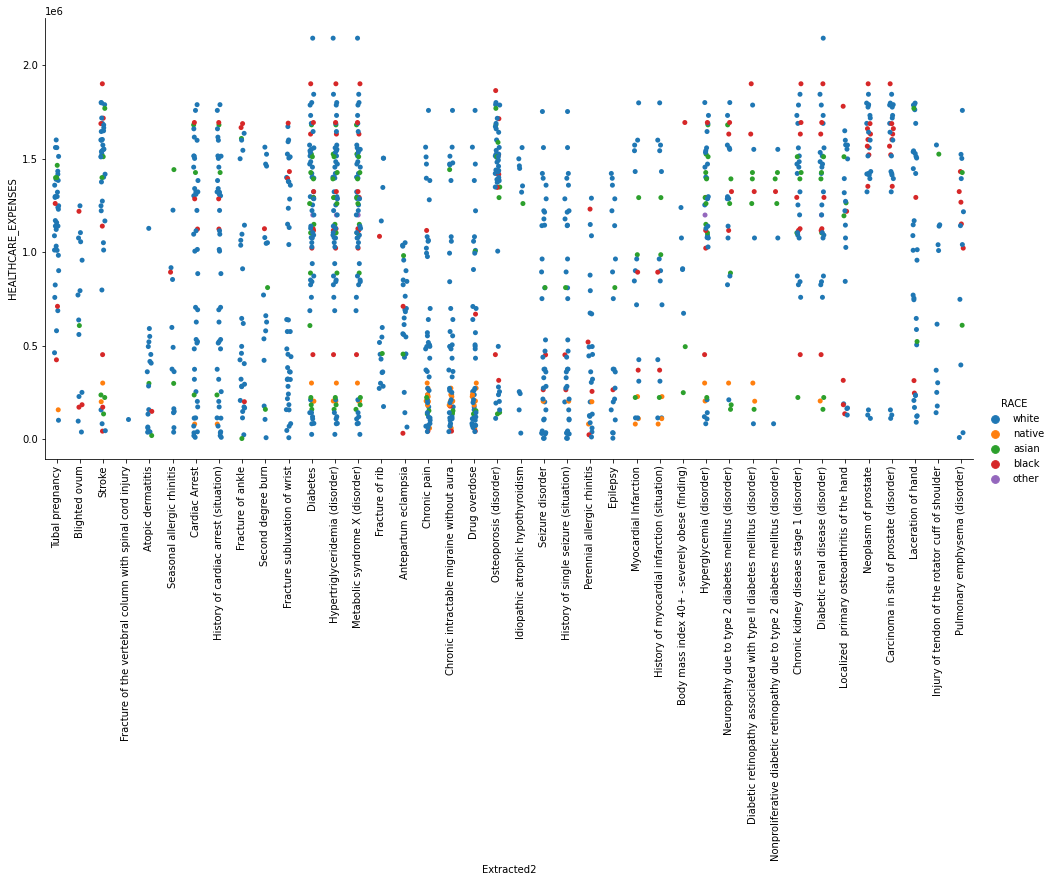

In [ ]:
sns.catplot(x="Extracted2", y="HEALTHCARE_EXPENSES", data=df_merge_col,height=7, aspect=2,hue="RACE")
plt.xticks(rotation = 90)
plt.show()

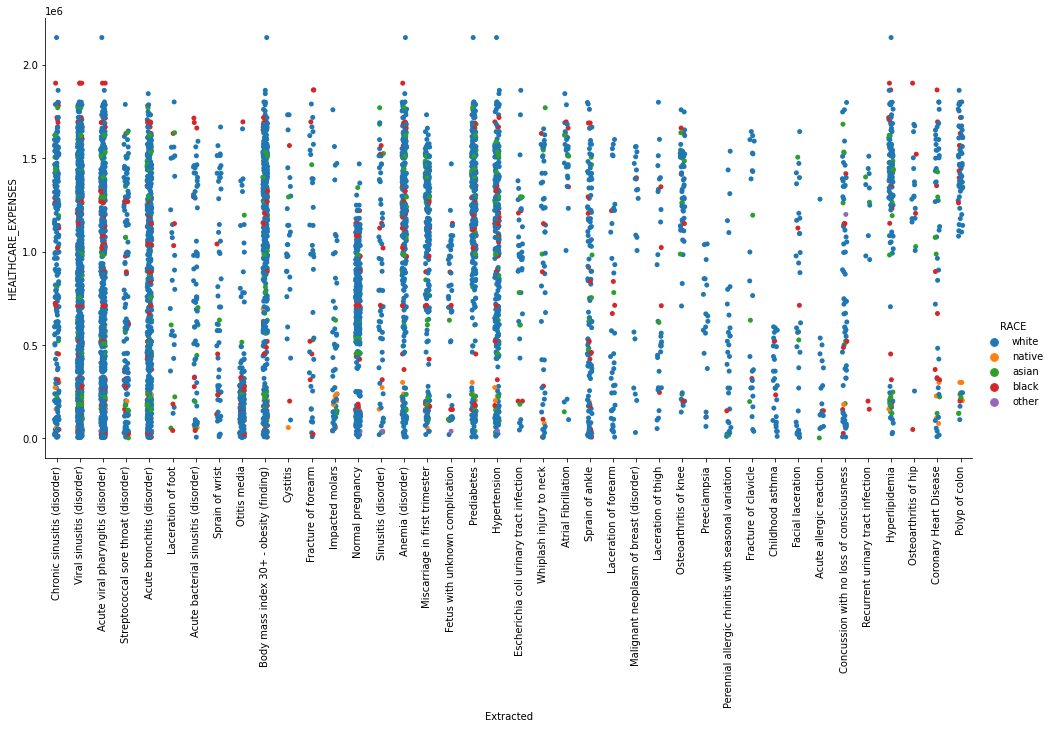

In [ ]:
sns.catplot(x="Extracted", y="HEALTHCARE_EXPENSES", data=df_merge_col,height=7, aspect=2,hue="RACE")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Coronary Heart Disease  Cardiac Arrest History of Cardiac Arrest  Hypertriglycerideamia Metabolic Syndrome Myocardial infraction History of Myocardial infraction  

In [ ]:
names3=["Coronary Heart Disease","Cardiac Arrest","History of cardiac arrest (situation)","Hypertriglyceridemia (disorder)","Myocardial Infarction","History of myocardial infarction (situation)"]

In [ ]:
def extractServiceName(x):
    if x in  names3:
        return x
    else:
        return ''
data['Extracted7'] = data["DESCRIPTION"].apply(lambda x : extractServiceName(x))

In [ ]:
 data['Extracted7'].replace('', np.nan, inplace=True)

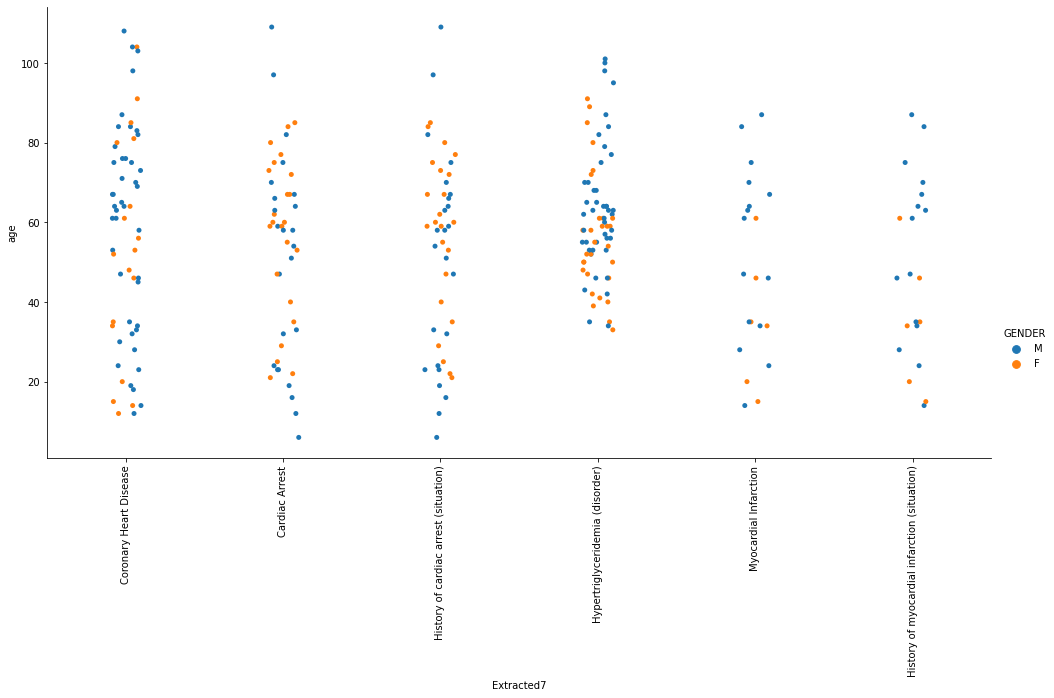

In [ ]:
sns.catplot(x="Extracted7", y="age", data=df_merge_col,height=7, aspect=2,hue="GENDER")
plt.xticks(rotation = 90)
plt.show()